# Visualizing data 

In [160]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sb

In [161]:
df = pd.read_csv('flow.csv', parse_dates= True)
df.head()

C:\Users\HF\AppData\Local\Temp\ipykernel_19508\3771027428.py:1: DtypeWarning: Columns (3,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('flow.csv', parse_dates= True)


,Timestamp,Datapath_id,Ip_src,Mac_src,Ip_dst,Mac_dst,Arp,Arp_code,Ip_protocole,Port_src,...,Packet_count,Pkt_per_sec,Pkt_per_nsec,Bytes,Bytes_per_sec,Bytes_per_nsec,Hard_timeout,Idle_timeout,Attack,Attack_type
0,1.711896e+09,4,10.0.0.3,NaN,10.0.0.8,NaN,0,NaN,6.0,39718.0,...,0,0.0,0.0,0,0.0,0.0,120,60,0,NaN
1,1.711896e+09,4,10.0.0.8,NaN,10.0.0.3,NaN,0,NaN,6.0,5005.0,...,0,0.0,0.0,0,0.0,0.0,120,60,0,NaN
2,1.711896e+09,4,10.0.0.3,NaN,10.0.0.8,NaN,0,NaN,6.0,39718.0,...,38790,0.0,0.0,1742707740,0.0,0.0,120,60,0,NaN
3,1.711896e+09,4,10.0.0.3,NaN,10.0.0.8,NaN,0,NaN,6.0,39718.0,...,785,0.0,0.0,1187042,0.0,0.0,120,60,0,NaN
4,1.711896e+09,4,10.0.0.8,NaN,10.0.0.3,NaN,0,NaN,6.0,5005.0,...,29240,0.0,0.0,1929852,0.0,0.0,120,60,0,NaN


In [162]:
df.shape

(1600095, 44)

---- Attack ----
[0 1]
Number of attacks: 2


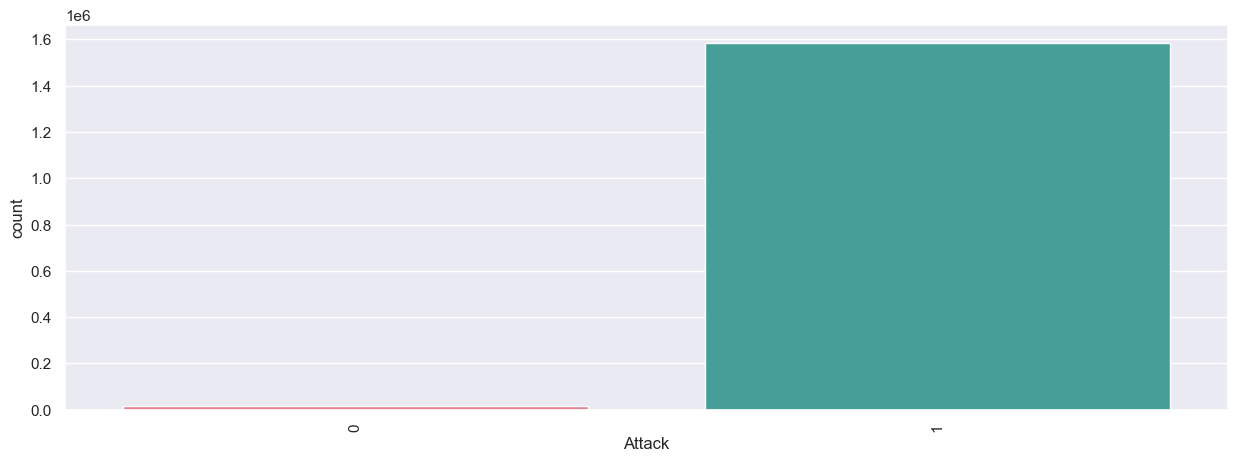

In [163]:
#check unique value for each column Attack
print('---- Attack ----')
print(df['Attack'].unique())
print('Number of attacks:', len(df['Attack'].unique()))
colors = sb.color_palette("husl", len(df['Attack'].unique()))
sb.set(rc={'figure.figsize':(15,5)})
#Plot Bar chart to understand Attacks
p=sb.countplot(x='Attack', hue='Attack', data=df, palette=colors, legend=False)
_ = plt.setp(p.get_xticklabels(), rotation=90)

In [164]:
df = df.drop(columns=['Timestamp', 'Datapath_id', 'Ip_src', 'Ip_dst', 'Mac_src', 'Mac_dst',
                        'Ip_protocole', 'Port_src','Tcp_flags','NS','WCR','ECE','URG','SSL','SSH', 'Hard_timeout', 'Idle_timeout','Attack_type'])
df

,Arp,Arp_code,Port_dst,Icmp,Icmp_code,Icmp_type,Tcp,ACK,PSH,RST,...,Dhcp,Flow_duration,Flow_dur_nsec,Packet_count,Pkt_per_sec,Pkt_per_nsec,Bytes,Bytes_per_sec,Bytes_per_nsec,Attack
0,0,NaN,5005.0,0.0,NaN,NaN,1.0,0.0,0.0,0.0,...,0.0,0,599000000,0,0.000000,0.000000e+00,0,0.000000,0.000000e+00,0
1,0,NaN,39718.0,0.0,NaN,NaN,1.0,1.0,0.0,0.0,...,0.0,0,596000000,0,0.000000,0.000000e+00,0,0.000000,0.000000e+00,0
2,0,NaN,5005.0,0.0,NaN,NaN,1.0,1.0,1.0,0.0,...,0.0,0,563000000,38790,0.000000,0.000000e+00,1742707740,0.000000,0.000000e+00,0
3,0,NaN,5005.0,0.0,NaN,NaN,1.0,1.0,0.0,0.0,...,0.0,0,561000000,785,0.000000,0.000000e+00,1187042,0.000000,0.000000e+00,0
4,0,NaN,39718.0,0.0,NaN,NaN,1.0,1.0,0.0,0.0,...,0.0,0,542000000,29240,0.000000,0.000000e+00,1929852,0.000000,0.000000e+00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1600090,0,NaN,60444.0,0.0,NaN,NaN,1.0,1.0,0.0,0.0,...,0.0,74,824000000,8,0.108108,9.708738e-09,3436,46.432432,4.169903e-06,1
1600091,0,NaN,60460.0,0.0,NaN,NaN,1.0,1.0,0.0,0.0,...,0.0,74,811000000,7,0.094595,8.631319e-09,1922,25.972973,2.369914e-06,1
1600092,0,NaN,60444.0,0.0,NaN,NaN,1.0,1.0,1.0,0.0,...,0.0,74,811000000,2,0.027027,2.466091e-09,444,6.000000,5.474723e-07,1
1600093,0,NaN,60444.0,0.0,NaN,NaN,1.0,1.0,1.0,0.0,...,0.0,74,810000000,1,0.013514,1.234568e-09,1351,18.256757,1.667901e-06,1


# Missing value analysis

In [165]:
number_null_value=df.isnull().sum()
number_null_value

Arp                     0
Arp_code          1599181
Port_dst           324324
Icmp                  914
Icmp_code         1276685
Icmp_type         1276685
Tcp                   914
ACK                634558
PSH                634558
RST                634558
SYN                634558
FIN                634558
Http                  914
Ftp                   914
Udp                   914
Dns                   914
Dhcp                  914
Flow_duration           0
Flow_dur_nsec           0
Packet_count            0
Pkt_per_sec             0
Pkt_per_nsec            0
Bytes                   0
Bytes_per_sec           0
Bytes_per_nsec          0
Attack                  0
dtype: int64

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600095 entries, 0 to 1600094
Data columns (total 26 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   Arp             1600095 non-null  int64  
 1   Arp_code        914 non-null      float64
 2   Port_dst        1275771 non-null  float64
 3   Icmp            1599181 non-null  float64
 4   Icmp_code       323410 non-null   float64
 5   Icmp_type       323410 non-null   float64
 6   Tcp             1599181 non-null  float64
 7   ACK             965537 non-null   float64
 8   PSH             965537 non-null   float64
 9   RST             965537 non-null   float64
 10  SYN             965537 non-null   float64
 11  FIN             965537 non-null   float64
 12  Http            1599181 non-null  float64
 13  Ftp             1599181 non-null  float64
 14  Udp             1599181 non-null  float64
 15  Dns             1599181 non-null  float64
 16  Dhcp            1599181 non-null  fl

In [167]:
df[['Arp_code','Icmp_code','Icmp_type']] = df[['Arp_code','Icmp_code','Icmp_type']].fillna(-1).copy()
df[['Arp','Port_dst','Icmp','Tcp', 'ACK', 'PSH', 'RST', 'SYN', 'FIN', 'Http', 'Ftp', 'Udp', 'Dns', 'Dhcp']] = df[['Arp','Port_dst','Icmp','Tcp', 'ACK', 'PSH', 'RST', 'SYN', 'FIN', 'Http', 'Ftp', 'Udp', 'Dns', 'Dhcp']].fillna(0).copy()

# Correlation Analysis

### Data description

In [168]:
df.describe()

,Arp,Arp_code,Port_dst,Icmp,Icmp_code,Icmp_type,Tcp,ACK,PSH,RST,...,Dhcp,Flow_duration,Flow_dur_nsec,Packet_count,Pkt_per_sec,Pkt_per_nsec,Bytes,Bytes_per_sec,Bytes_per_nsec,Attack
count,1.600095e+06,1.600095e+06,1.600095e+06,1.600095e+06,1.600095e+06,1.600095e+06,1.600095e+06,1.600095e+06,1.600095e+06,1.600095e+06,...,1.600095e+06,1.600095e+06,1.600095e+06,1.600095e+06,1.600095e+06,1.600095e+06,1.600095e+06,1.600095e+06,1.600095e+06,1.600095e+06
mean,5.712161e-04,-9.984226e-01,8.696955e+03,2.021192e-01,-7.970820e-01,8.167821e-01,6.034248e-01,3.073643e-01,1.224827e-01,4.280058e-02,...,3.874770e-05,2.402611e+01,4.986113e+08,2.707781e+01,1.946154e+00,6.231103e-08,6.955488e+05,5.005151e+04,1.463844e-03,9.901231e-01
std,2.389331e-02,6.676264e-02,1.892675e+04,4.015808e-01,4.061246e-01,3.611657e+00,4.891865e-01,4.614018e-01,3.278426e-01,2.024073e-01,...,6.224646e-03,1.805770e+01,2.872234e+08,1.819203e+03,2.377103e+02,4.448022e-06,6.753337e+07,8.865342e+06,1.532510e-01,9.889068e-02
min,0.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,-1.000000e+00,2.100000e+01,0.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,8.000000e+00,2.510000e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
50%,0.000000e+00,-1.000000e+00,5.300000e+01,0.000000e+00,-1.000000e+00,-1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,2.100000e+01,4.980000e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,0.000000e+00,-1.000000e+00,8.000000e+01,0.000000e+00,-1.000000e+00,-1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,3.900000e+01,7.460000e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
max,1.000000e+00,2.000000e+00,6.099800e+04,1.000000e+00,3.000000e+00,8.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,9.400000e+01,9.990000e+08,2.855880e+05,9.519600e+04,8.005171e-04,1.309046e+10,4.363486e+09,2.591229e+01,1.000000e+00


### Data correlation

<Axes: >

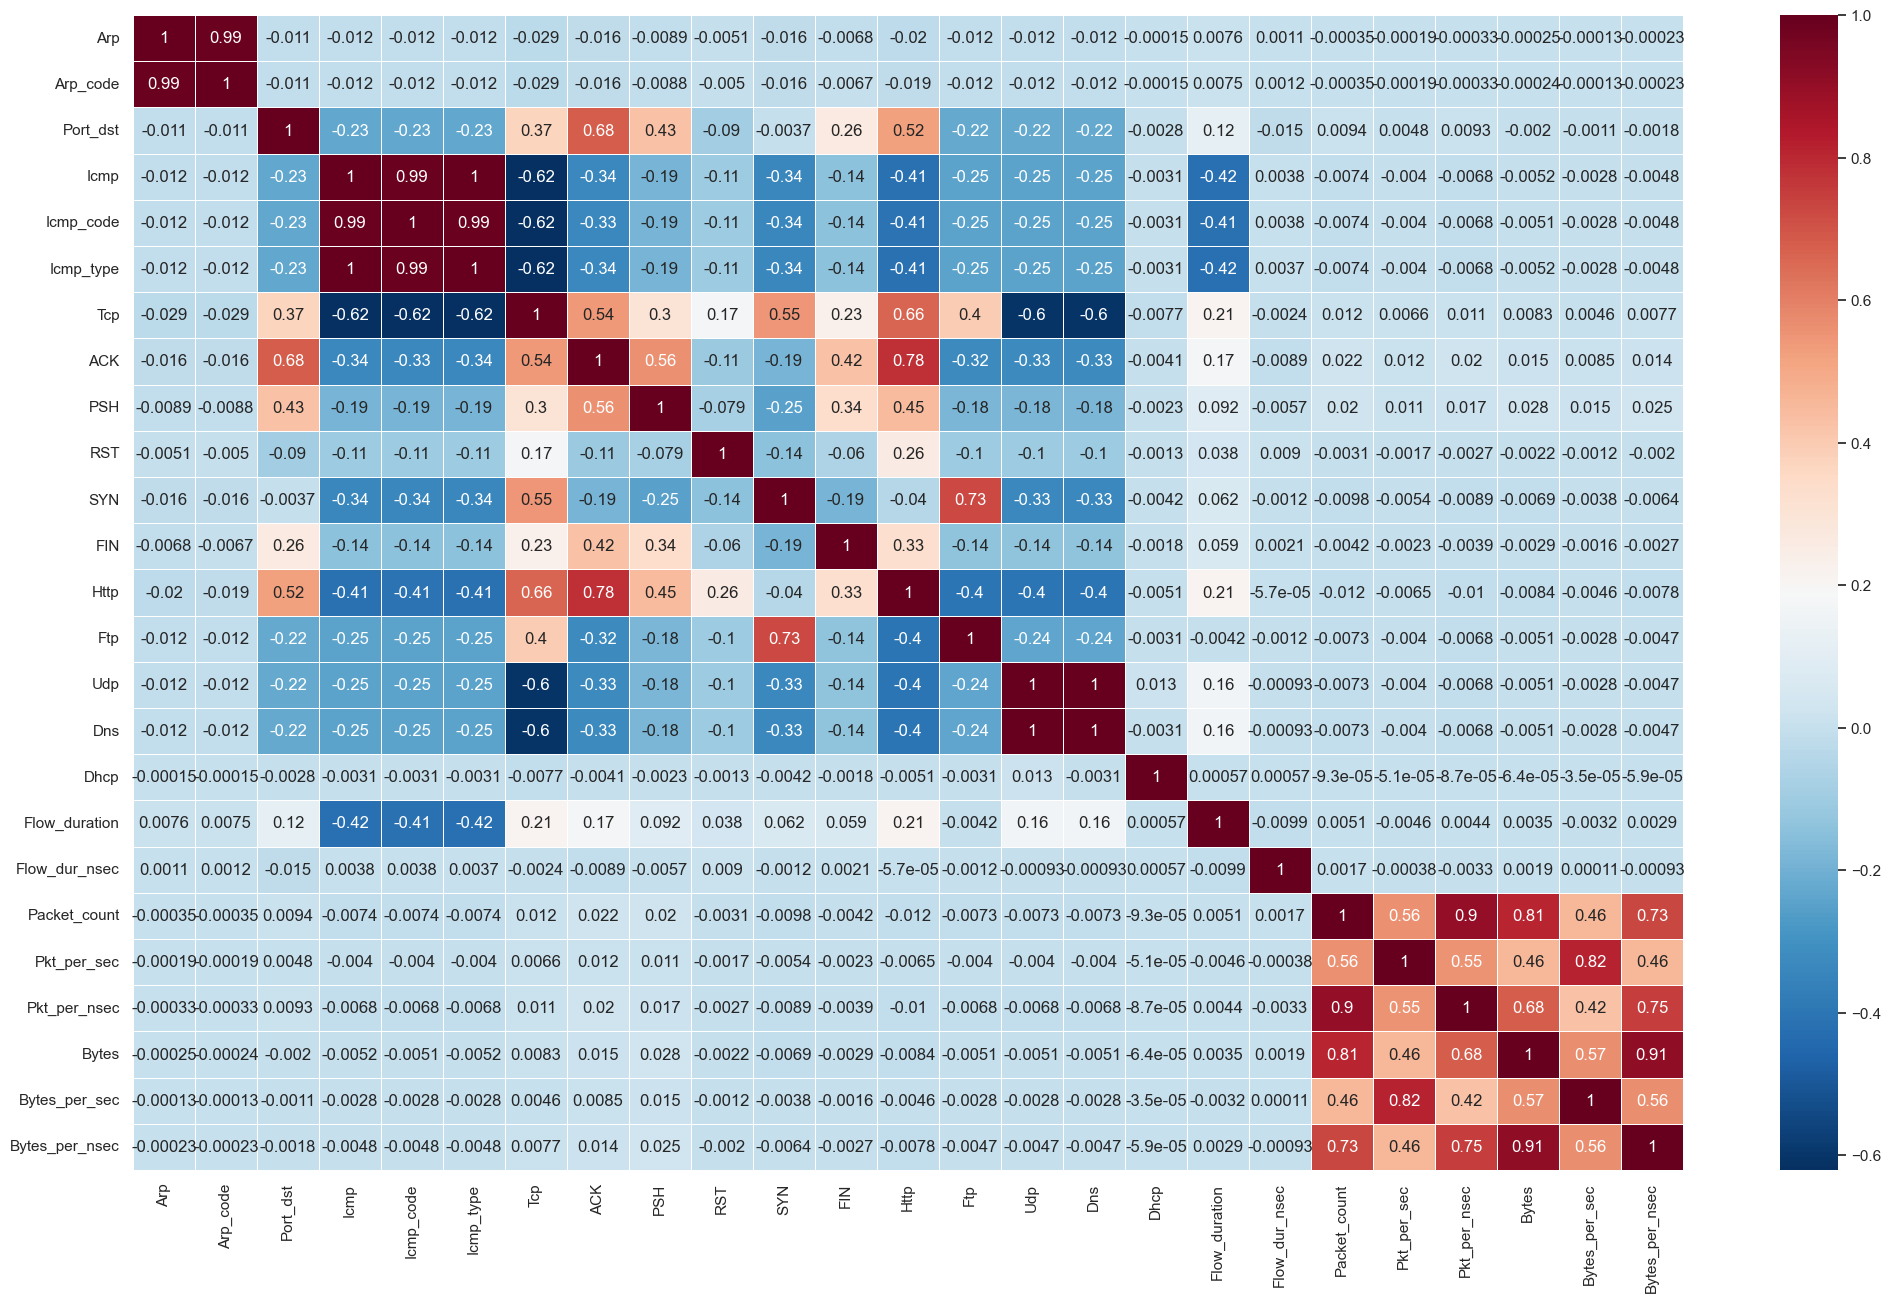

In [169]:
matrix_corr_pearson = df.drop(columns=['Attack'], axis=1).corr(method='pearson')
sb.set(rc={'figure.figsize':(25,15)})
sb.heatmap(matrix_corr_pearson, 
            xticklabels=matrix_corr_pearson.columns,
            yticklabels=matrix_corr_pearson.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

In [170]:
columnsdrop=['Bytes_per_nsec','Pkt_per_nsec','Flow_dur_nsec','Dns','Icmp','Icmp_code','Arp']
df=df.drop(columns=columnsdrop,axis=1)
df

,Arp_code,Port_dst,Icmp_type,Tcp,ACK,PSH,RST,SYN,FIN,Http,Ftp,Udp,Dhcp,Flow_duration,Packet_count,Pkt_per_sec,Bytes,Bytes_per_sec,Attack
0,-1.0,5005.0,-1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0.000000,0,0.000000,0
1,-1.0,39718.0,-1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0.000000,0,0.000000,0
2,-1.0,5005.0,-1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,38790,0.000000,1742707740,0.000000,0
3,-1.0,5005.0,-1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,785,0.000000,1187042,0.000000,0
4,-1.0,39718.0,-1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,29240,0.000000,1929852,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1600090,-1.0,60444.0,-1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,74,8,0.108108,3436,46.432432,1
1600091,-1.0,60460.0,-1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,74,7,0.094595,1922,25.972973,1
1600092,-1.0,60444.0,-1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,74,2,0.027027,444,6.000000,1
1600093,-1.0,60444.0,-1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,74,1,0.013514,1351,18.256757,1


# Feature Engineering

In [171]:
columns=list(df.columns)
columns

['Arp_code',
 'Port_dst',
 'Icmp_type',
 'Tcp',
 'ACK',
 'PSH',
 'RST',
 'SYN',
 'FIN',
 'Http',
 'Ftp',
 'Udp',
 'Dhcp',
 'Flow_duration',
 'Packet_count',
 'Pkt_per_sec',
 'Bytes',
 'Bytes_per_sec',
 'Attack']

In [172]:
df.dtypes

Arp_code         float64
Port_dst         float64
Icmp_type        float64
Tcp              float64
ACK              float64
PSH              float64
RST              float64
SYN              float64
FIN              float64
Http             float64
Ftp              float64
Udp              float64
Dhcp             float64
Flow_duration      int64
Packet_count       int64
Pkt_per_sec      float64
Bytes              int64
Bytes_per_sec    float64
Attack             int64
dtype: object

In [173]:
print(len(df['Attack'].unique()))

2


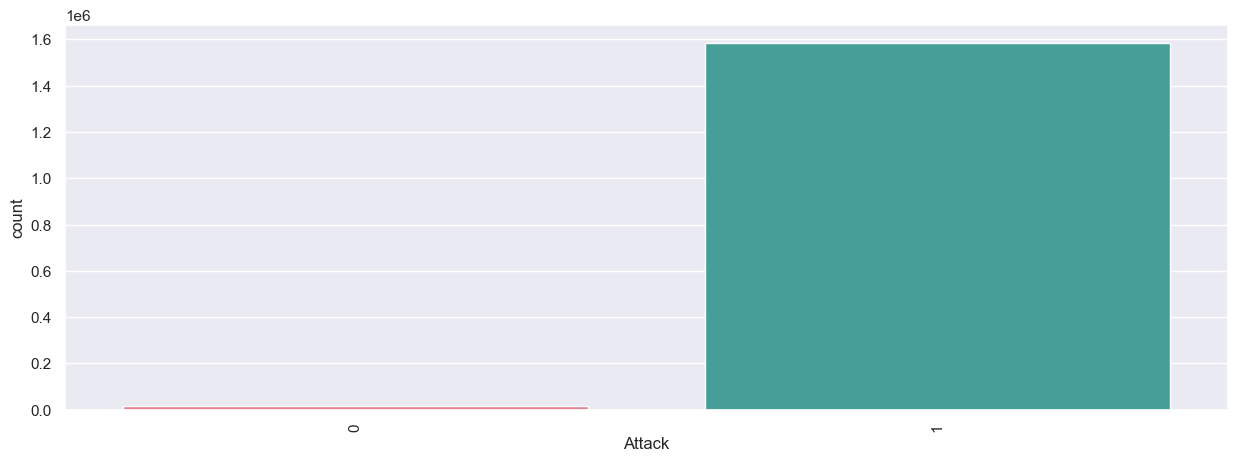

In [174]:
colors = sb.color_palette("husl", len(df['Attack'].unique()))
sb.set(rc={'figure.figsize':(15,5)})
#Plot Bar chart to understand Attack types
p=sb.countplot(x='Attack', hue='Attack', data=df, palette=colors, legend=False)
_ = plt.setp(p.get_xticklabels(), rotation=90)

In [175]:
df.groupby('Attack').size()

Attack
0      15804
1    1584291
dtype: int64

In [176]:
df.shape

(1600095, 19)

## Handle imbalenced data

Class=0, n=15804 (0.988%)
Class=1, n=1584291 (99.012%)


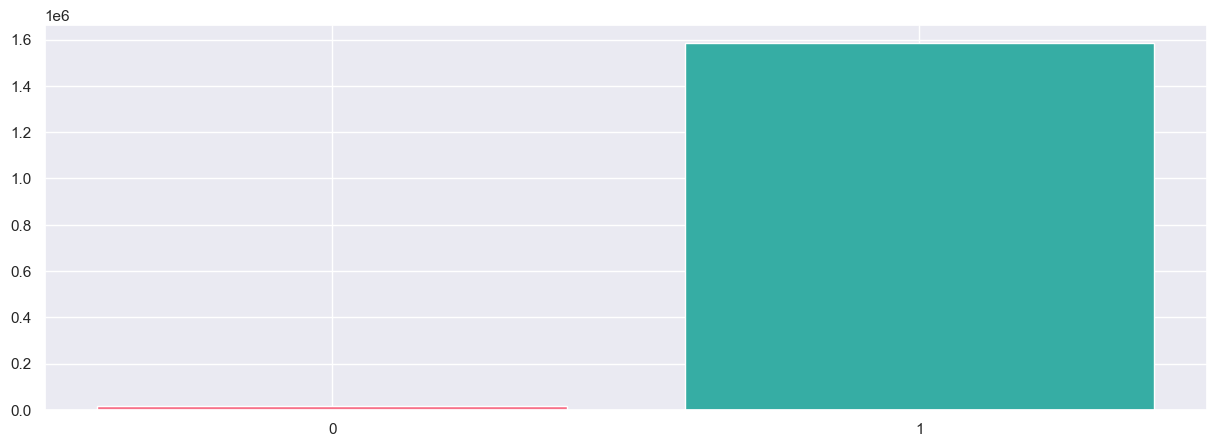

In [181]:
from collections import Counter
dataa = df.values
X, y = dataa[:, :-1], dataa[:, -1]
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
colors = sb.color_palette("husl", len(df['Attack'].unique()))
plt.bar(counter.keys(), counter.values(), color = colors)
plt.xticks(ticks=[0, 1])
plt.show()

Class=0, n=1584291 (50.000%)
Class=1, n=1584291 (50.000%)


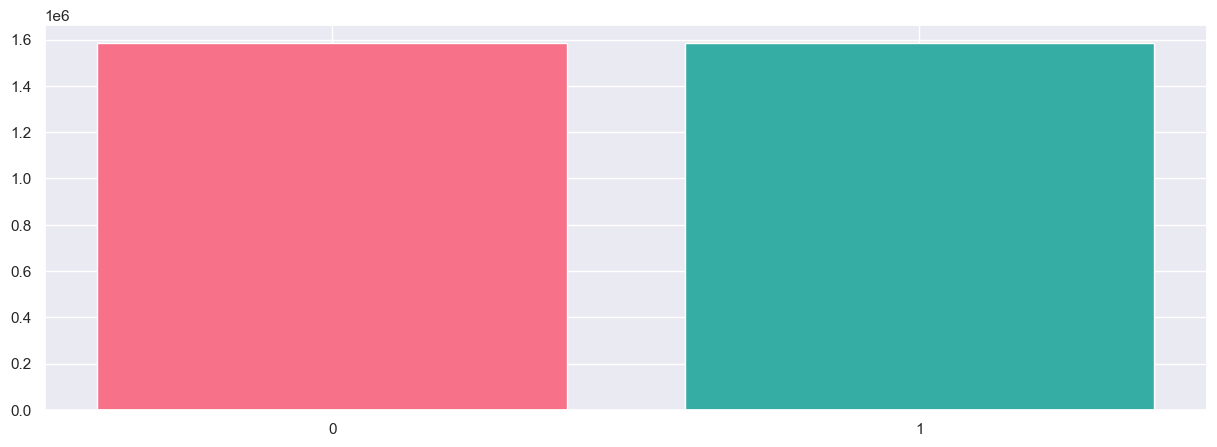

In [182]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(random_state=42)
X, y = oversample.fit_resample(X, y)
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
colors = sb.color_palette("husl", len(df['Attack'].unique()))
plt.bar(counter.keys(), counter.values(), color = colors)
plt.xticks(ticks=[0, 1])
plt.show()

In [183]:
df.describe()

,Arp_code,Port_dst,Icmp_type,Tcp,ACK,PSH,RST,SYN,FIN,Http,Ftp,Udp,Dhcp,Flow_duration,Packet_count,Pkt_per_sec,Bytes,Bytes_per_sec,Attack
count,1.600095e+06,1.600095e+06,1.600095e+06,1.600095e+06,1.600095e+06,1.600095e+06,1.600095e+06,1.600095e+06,1.600095e+06,1.600095e+06,1.600095e+06,1.600095e+06,1.600095e+06,1.600095e+06,1.600095e+06,1.600095e+06,1.600095e+06,1.600095e+06,1.600095e+06
mean,-9.984226e-01,8.696955e+03,8.167821e-01,6.034248e-01,3.073643e-01,1.224827e-01,4.280058e-02,3.120890e-01,7.389436e-02,4.017024e-01,1.940385e-01,1.938847e-01,3.874770e-05,2.402611e+01,2.707781e+01,1.946154e+00,6.955488e+05,5.005151e+04,9.901231e-01
std,6.676264e-02,1.892675e+04,3.611657e+00,4.891865e-01,4.614018e-01,3.278426e-01,2.024073e-01,4.633461e-01,2.615990e-01,4.902425e-01,3.954588e-01,3.953398e-01,6.224646e-03,1.805770e+01,1.819203e+03,2.377103e+02,6.753337e+07,8.865342e+06,9.889068e-02
min,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,-1.000000e+00,2.100000e+01,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
50%,-1.000000e+00,5.300000e+01,-1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,-1.000000e+00,8.000000e+01,-1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
max,2.000000e+00,6.099800e+04,8.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,9.400000e+01,2.855880e+05,9.519600e+04,1.309046e+10,4.363486e+09,1.000000e+00
